Author: Aniol Molero Grau

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

---

In [2]:
train_df = pd.read_csv("data/titanic_train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Count NA for each column
print("Missing values per column:")
print(train_df.isna().sum())

Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
counts = train_df["Survived"].value_counts()
percent = train_df["Survived"].value_counts(normalize=True).mul(100).round(2)
pd.DataFrame({"count": counts, "percentage": percent})


,count,percentage
Survived,,
0,549,61.62
1,342,38.38


In [5]:
pclass_counts = train_df['Pclass'].value_counts()
pclass_percent = train_df['Pclass'].value_counts(normalize=True).mul(100).round(2)
display(pd.DataFrame({"count": pclass_counts, "percentage": pclass_percent}))

,count,percentage
Pclass,,
3,491,55.11
1,216,24.24
2,184,20.65


Half the passengers were in 3rd class.

In [6]:
survival_by_class = train_df.groupby('Pclass')['Survived'].value_counts(normalize=True).mul(100).round(2)
print("\nSurvival rates by Pclass (%):")
display(survival_by_class.unstack())


Survival rates by Pclass (%):


Survived,0,1
Pclass,,
1,37.04,62.96
2,52.72,47.28
3,75.76,24.24


As expected, the better the class, the better the survival rate

In [7]:
survival_by_sex = train_df.groupby('Sex')['Survived'].value_counts(normalize=True).mul(100).round(2)
print("\nSurvival rates by Sex (%):")
display(survival_by_sex.unstack())


Survival rates by Sex (%):


Survived,0,1
Sex,,
female,25.80,74.20
male,81.11,18.89


On average, men were much less likely to survive.

Let's add age to the equation. I'll set 13 as an age threshold, since it seems to be the point where there are almost no differences due to sex.

In [8]:
train_df_non_missing_age = train_df[train_df['Age'].notna()].copy()


# Define age threshold
target_age = 13


# Create age groups dynamically based on target_age
train_df_non_missing_age.loc[:, 'AgeGroup'] = train_df_non_missing_age['Age'].apply(
    lambda x: f'<{target_age}' if x < target_age else f'{target_age}+'
)


# Survival rates by Sex and AgeGroup
survival_by_sex_age = train_df_non_missing_age.groupby(['Sex', 'AgeGroup'])['Survived'] \
                              .value_counts(normalize=True).mul(100).round(2)

print(f"\nSurvival rates by Sex and AgeGroup using threshold {target_age} (%):")
display(survival_by_sex_age.unstack())



Survival rates by Sex and AgeGroup using threshold 13 (%):


Survived             0      1
Sex    AgeGroup              
female 13+       22.27  77.73
       <13       40.62  59.38
male   13+       82.69  17.31
       <13       43.24  56.76

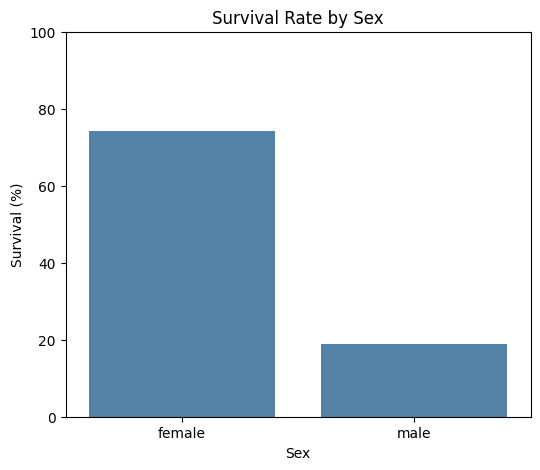

In [9]:
# Prepare data: survival rate by Sex
survival_sex_df = train_df.groupby('Sex')['Survived'].mean().reset_index()
survival_sex_df['SurvivalPercent'] = survival_sex_df['Survived'] * 100

# Plot
plt.figure(figsize=(6,5))
sns.barplot(data=survival_sex_df, x='Sex', y='SurvivalPercent', color='steelblue')
plt.title('Survival Rate by Sex')
plt.ylabel('Survival (%)')
plt.xlabel('Sex')
plt.ylim(0, 100)
plt.show()

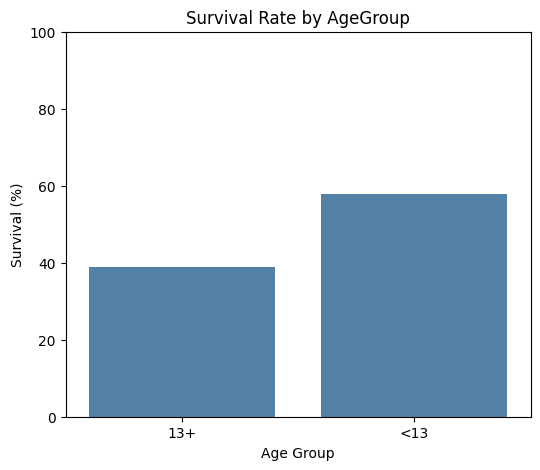

In [10]:
# Prepare data: survival rate by AgeGroup
survival_age_df = train_df_non_missing_age.groupby('AgeGroup')['Survived'].mean().reset_index()
survival_age_df['SurvivalPercent'] = survival_age_df['Survived'] * 100

# Plot
plt.figure(figsize=(6,5))
sns.barplot(data=survival_age_df, x='AgeGroup', y='SurvivalPercent', color='steelblue')
plt.title(f'Survival Rate by AgeGroup')
plt.ylabel('Survival (%)')
plt.xlabel('Age Group')
plt.ylim(0, 100)
plt.show()


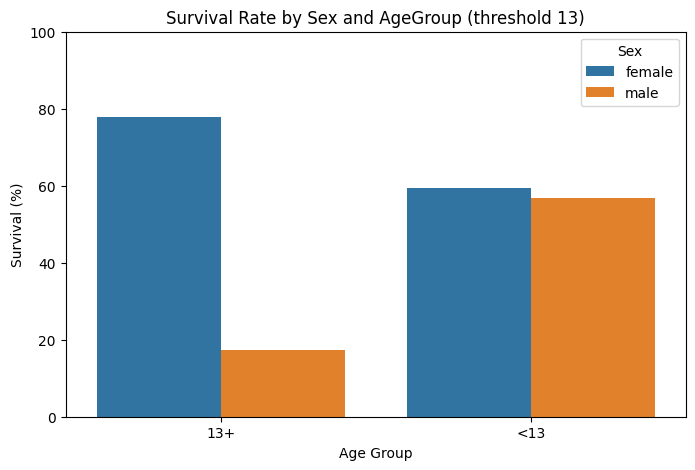

In [11]:
survival_plot_df = train_df_non_missing_age.groupby(['Sex', 'AgeGroup'])['Survived'] \
                           .mean().reset_index()  # mean gives survival fraction 0–1

survival_plot_df['SurvivalPercent'] = survival_plot_df['Survived'] * 100

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=survival_plot_df, x='AgeGroup', y='SurvivalPercent', hue='Sex')
plt.title(f'Survival Rate by Sex and AgeGroup (threshold {target_age})')
plt.ylabel('Survival (%)')
plt.xlabel('Age Group')
plt.ylim(0, 100)
plt.legend(title='Sex')
plt.show()

In [12]:
# Women 
women_adult_surv = train_df[(train_df['Sex'] == 'female') & (train_df['Age'] >= target_age)]['Survived'].mean() * 100

# Men 
men_adult_surv = train_df[(train_df['Sex'] == 'male') & (train_df['Age'] >= target_age)]['Survived'].mean() * 100

# Kids < target_age (both sexes)
kids_surv = train_df[train_df['Age'] < target_age]['Survived'].mean() * 100

# Print
print(f"Survival rate for Women ({target_age}+): {women_adult_surv:.2f}%")
print(f"Survival rate for Men ({target_age}+): {men_adult_surv:.2f}%")
print(f"Survival rate for Kids (<{target_age}): {kids_surv:.2f}%")


Survival rate for Women (13+): 77.73%
Survival rate for Men (13+): 17.31%
Survival rate for Kids (<13): 57.97%


The 'Women and children first' principle is evident. Interestingly, older women had higher survival rates than very young children, which suggests either that women were given priority for lifeboats or that they were, on average, more capable of surviving the disaster than very young children.

In [13]:
train_df_non_missing_age = train_df[train_df['Age'].notna()].copy()

# Define thresholds
thresholds = [13, 18, 30, 50]

# Function to assign age group labels as ranges
def get_age_group_label(age, thresholds):
    if np.isnan(age):
        return 'Unknown'
    if age < thresholds[0]:
        return f'<{thresholds[0]}'
    for i in range(1, len(thresholds)):
        if thresholds[i-1] <= age < thresholds[i]:
            return f'{thresholds[i-1]}–{thresholds[i]-1}'
    return f'{thresholds[-1]}+'

# Apply age groups
train_df_non_missing_age['AgeGroup'] = train_df_non_missing_age['Age'].apply(
    lambda x: get_age_group_label(x, thresholds)
)

# Define custom order for age groups
age_order = [f'<{thresholds[0]}'] + [f'{thresholds[i-1]}–{thresholds[i]-1}' for i in range(1, len(thresholds))] + [f'{thresholds[-1]}+']

# Make AgeGroup categorical with desired order
train_df_non_missing_age['AgeGroup'] = pd.Categorical(
    train_df_non_missing_age['AgeGroup'], 
    categories=age_order, 
    ordered=True
)

print(train_df_non_missing_age[['Sex', 'AgeGroup']].value_counts().sort_index())

# Compute survival rates
survival_summary = train_df_non_missing_age.groupby(['Sex', 'AgeGroup'], observed=False)['Survived'] \
                                           .mean().mul(100).round(2).reset_index()

# Sort by Sex and AgeGroup
survival_summary = survival_summary.sort_values(by=['Sex', 'AgeGroup'])

# Print nicely
for _, row in survival_summary.iterrows():
    print(f"Survival rate for {row['Sex']} (AgeGroup {row['AgeGroup']}): {row['Survived']}%")


Sex     AgeGroup
female  <13          32
        13–17        23
        18–29        92
        30–49        92
        50+          22
male    <13          37
        13–17        21
        18–29       179
        30–49       164
        50+          52
Name: count, dtype: int64
Survival rate for female (AgeGroup <13): 59.38%
Survival rate for female (AgeGroup 13–17): 82.61%
Survival rate for female (AgeGroup 18–29): 72.83%
Survival rate for female (AgeGroup 30–49): 78.26%
Survival rate for female (AgeGroup 50+): 90.91%
Survival rate for male (AgeGroup <13): 56.76%
Survival rate for male (AgeGroup 13–17): 9.52%
Survival rate for male (AgeGroup 18–29): 15.64%
Survival rate for male (AgeGroup 30–49): 21.34%
Survival rate for male (AgeGroup 50+): 13.46%


A bit more insight.

Survival is highest for older women (50+), even higher than younger teens.

Male survival increases slightly from teens to middle-aged adults (13–49), then drops again in 50+

Survival does not steadily decrease or increase with age. Evidently non-linear relationships.

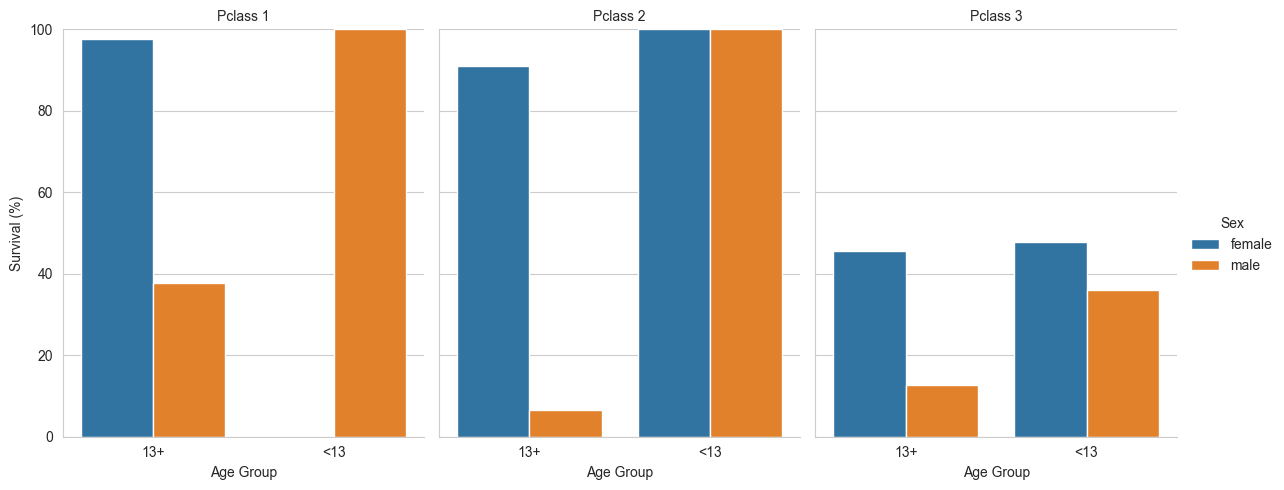

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a style with grid
sns.set_style("whitegrid")  # adds grid to all plots

target_age = 13

# Ensure AgeGroup is string
train_df_non_missing_age['AgeGroup'] = train_df_non_missing_age['AgeGroup'].astype(str)

# Assign age groups dynamically
train_df_non_missing_age['AgeGroup'] = train_df_non_missing_age['Age'].apply(
    lambda x: f'<{target_age}' if x < target_age else f'{target_age}+'
)

# Compute survival rates by Sex, AgeGroup, and Pclass
survival_plot_df = train_df_non_missing_age.groupby(['Pclass', 'Sex', 'AgeGroup'])['Survived'] \
                           .mean().reset_index()
survival_plot_df['SurvivalPercent'] = survival_plot_df['Survived'] * 100

# Plot using FacetGrid
g = sns.catplot(
    data=survival_plot_df,
    x='AgeGroup',
    y='SurvivalPercent',
    hue='Sex',
    col='Pclass',
    kind='bar',
    height=5,
    aspect=0.8
)

g.set_titles("Pclass {col_name}")
g.set_axis_labels("Age Group", "Survival (%)")
g.set(ylim=(0, 100))
g._legend.set_title('Sex')

plt.show()


In [15]:
target_age = 13

# Create AgeGroup dynamically
train_df_non_missing_age['AgeGroup'] = train_df_non_missing_age['Age'].apply(
    lambda x: f'<{target_age}' if x < target_age else f'{target_age}+'
)

# Define the passenger classes
classes = sorted(train_df_non_missing_age['Pclass'].unique())

for pclass in classes:
    print(f"\nPclass {pclass}:")
    
    # Subset for this class
    df_class = train_df_non_missing_age[train_df_non_missing_age['Pclass'] == pclass]
    
    # Survival rates with sample size
    for sex in ['female', 'male']:
        for age_group in [f'<{target_age}', f'{target_age}+']:
            subset = df_class[(df_class['Sex'] == sex) & (df_class['AgeGroup'] == age_group)]
            n = len(subset)
            if n == 0:
                print(f"  Survival rate for {sex} (AgeGroup {age_group}): No data")
            else:
                surv_pct = subset['Survived'].mean() * 100
                survived_count = subset['Survived'].sum()
                print(f"  Survival rate for {sex} (AgeGroup {age_group}): {surv_pct:.2f}% ({int(survived_count)}/{n})")



Pclass 1:
  Survival rate for female (AgeGroup <13): 0.00% (0/1)
  Survival rate for female (AgeGroup 13+): 97.62% (82/84)
  Survival rate for male (AgeGroup <13): 100.00% (3/3)
  Survival rate for male (AgeGroup 13+): 37.76% (37/98)

Pclass 2:
  Survival rate for female (AgeGroup <13): 100.00% (8/8)
  Survival rate for female (AgeGroup 13+): 90.91% (60/66)
  Survival rate for male (AgeGroup <13): 100.00% (9/9)
  Survival rate for male (AgeGroup 13+): 6.67% (6/90)

Pclass 3:
  Survival rate for female (AgeGroup <13): 47.83% (11/23)
  Survival rate for female (AgeGroup 13+): 45.57% (36/79)
  Survival rate for male (AgeGroup <13): 36.00% (9/25)
  Survival rate for male (AgeGroup 13+): 12.72% (29/228)


In [16]:
# Filter for the girl in 1st class who died
girl_1st_class_died = train_df_non_missing_age[
    (train_df_non_missing_age['Sex'] == 'female') &
    (train_df_non_missing_age['Pclass'] == 1) &
    (train_df_non_missing_age['Age'] < 13)
]

# Display her age
girl_1st_class_died[['Name', 'Age', 'Sex', 'Pclass', 'SibSp', 'Parch', 'Survived']]


,Name,Age,Sex,Pclass,SibSp,Parch,Survived
297,"Allison, Miss. Helen Loraine",2.0,female,1,1,2,0


In [17]:
# Search all 1st class passengers with surname 'Allison'
all_allison_1st_class = train_df[
    (train_df['Pclass'] == 1) &
    ((train_df['Name'].str.contains('Allison')) | (train_df['Name'].str.contains('Hudson')))
]

all_allison_1st_class[['Name', 'Age', 'Sex', 'Pclass', 'SibSp', 'Parch', 'Survived']]


,Name,Age,Sex,Pclass,SibSp,Parch,Survived
297,"Allison, Miss. Helen Loraine",2.00,female,1,1,2,0
305,"Allison, Master. Hudson Trevor",0.92,male,1,1,2,1
498,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.00,female,1,1,2,0


According to the SibSp and Parch variables, the Allison family should have included the father as well, but he does not appear in the dataset. Although the family traveled in 1st class, only the infant son, Trevor, survived. This is unusual, given that all other children in 1st and 2nd class survived, and women in 1st class had a 97% survival rate.

In [21]:
test_df = pd.read_csv("data/titanic_test.csv")
all_allison_1st_class = test_df[
    (test_df['Pclass'] == 1) &
    ((test_df['Name'].str.contains('Allison')) | (test_df['Name'].str.contains('Hudson')))
]

all_allison_1st_class[['Name', 'Age', 'Sex', 'Pclass', 'SibSp', 'Parch']]

,Name,Age,Sex,Pclass,SibSp,Parch
306,"Allison, Mr. Hudson Joshua Creighton",30.0,male,1,1,2


The father was in the test segment of the dataset. Since the test dataset has no information on survival outcome, I decided to investigate what really happened, so I looked up some information on the internet: https://en.wikipedia.org/wiki/Allison_family

In summary, Alice, a nurse that the Allison family hired, took Trevor with her to a lifeboat. Some stories say that she didn't inform Bessie that she was leaving with Trevor, and that Bessie refused to leave without him. Also according to reports, Bessie and Loraine managed to get safely into a boat and could have "gotten away in perfect safety". However, she "rushed away from the boat" when told that her husband was in another boat on the other side of the deck, only to find that he wasn't actually there. It would seem that she didn't manage to get in another boat.

So, after knowing this, it seems like a series of unfortunate circumstances (given the disaster) had to take place for a baby in first class (and her mother) to perish.
This case illustrates how individual survival outcomes could deviate sharply from broader statistical patterns, often due to highly specific circumstances rather than class, age, or gender alone.

---

Except the one girl that travelled in first class, all kids in 1st and 2nd class survived.
In third class, the survival rate for kids was much lower.

Almost all women in 1st and 2nd class survived (97.62% and 90.91%, respectively).
We can see a clear decrease in survival rate for women in 3rd class (45.57%).

For men, the survival rate was low across all classes. 
As expected, men in 1st class had a higher survival rate (37.76%), however, curiously enough, men in 2nd class had a lower surival rate (6.67%) than men in 3rd class (12.72%)



Much more exploratory data analysis could be performed, but this is enough for now.